In [12]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
iris = datasets.load_iris()

In [14]:
type(iris)

sklearn.utils.Bunch

In [15]:
iris = pd.DataFrame(iris.data, columns=iris.feature_names)

In [16]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
iris.drop(['petal length (cm)', 'petal width (cm)'], axis=1)

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


In [18]:
iris = np.array(iris)

In [19]:
type(iris)

numpy.ndarray

In [22]:
from sklearn.cluster import KMeans
distortions = []
for i in range(1, 11): 
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=1990)
    km.fit(iris)
    distortions.append(km.inertia_)

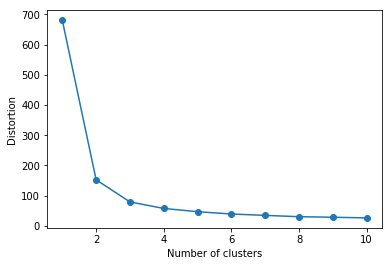

In [23]:
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [24]:
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=1990)
y_km = km.fit_predict(iris)

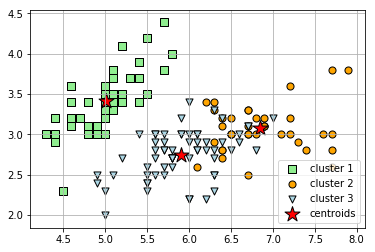

In [25]:
plt.scatter(iris[y_km == 0, 0], iris[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
plt.scatter(iris[y_km == 1, 0], iris[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(iris[y_km == 2, 0], iris[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

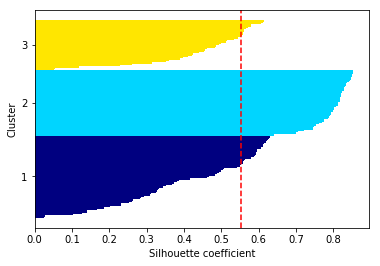

In [26]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(iris)
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(iris, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()